In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import pearsonr


### Analysing historical returns using dataset from A. Damodaran
Excel file downloaded from https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html and converted into a newer Excel format (xlsx)

In [2]:

df = pd.read_excel(os.getcwd()+"/data/histretsp.xlsx",
    sheet_name='Returns by year',
    header=None,
    nrows=93,
    skiprows=range(0,18),
    usecols=[0,1,2,3,4,5])

c:\ProgramData\Anaconda3\envs\trading\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
df.head()
df.columns =["year","SP500ret","3MTBill","10YUSTBond","BAACorpBond","RealEstate"]
df.set_index("year",inplace=True)


In [4]:
df.tail(5)

,SP500ret,3MTBill,10YUSTBond,BAACorpBond,RealEstate
year,,,,,
2016,0.117731,0.003161,0.006906,0.103651,0.053097
2017,0.216055,0.009341,0.028017,0.097239,0.062131
2018,-0.042269,0.019363,-0.000167,-0.027626,0.045327
2019,0.312117,0.020625,0.096356,0.153295,0.036916
2020,0.180232,0.003547,0.113319,0.104115,0.103461


In [5]:
df['10YUSTBond'].loc['2013':]

year
2013   -0.091046
2014    0.107462
2015    0.012843
2016    0.006906
2017    0.028017
2018   -0.000167
2019    0.096356
2020    0.113319
Name: 10YUSTBond, dtype: float64

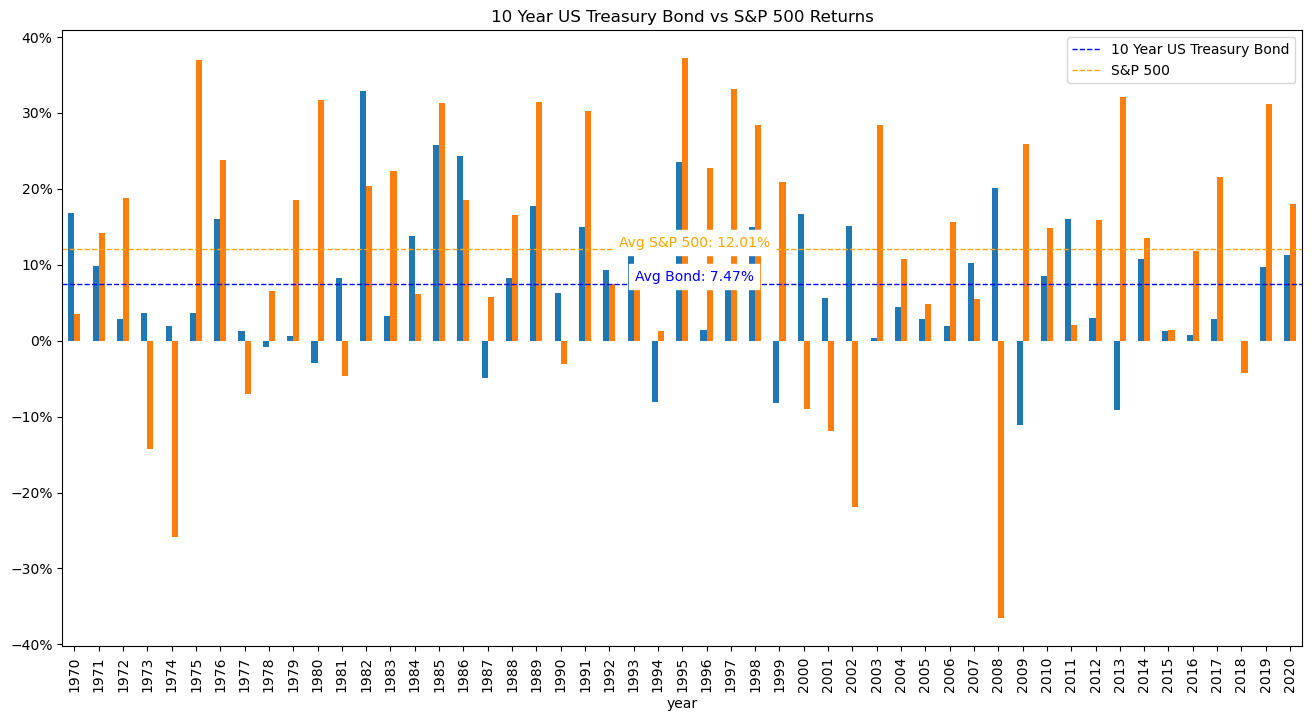

In [18]:
plt.figure(figsize=(16,8))

ax = df.loc['1970':][['10YUSTBond', 'SP500ret']].plot(kind='bar', figsize=(16,8), ax=plt.gca())

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # If your data is in decimal (e.g., 0.05 for 5%)

#df.loc['1970':][['10YUSTBond', 'SP500ret']].plot(kind='bar', figsize=(16,8))
#df['10YUSTBond'].loc['1970':].plot(label='10 Year US Treasure Bond')
#df['SP500ret'].loc['1970':].plot(label='S&P 500')


# Calculate averages
avg_bond = df.loc['1970':, '10YUSTBond'].mean()
avg_sp500 = df.loc['1970':, 'SP500ret'].mean()

bondline = plt.axhline(avg_bond, color='blue', linestyle='--', linewidth=1)
sp500_line = plt.axhline(avg_sp500, color='orange', linestyle='--', linewidth=1)

# Add labels to the average lines
ax.text(len(df.loc['1970':])/2, avg_bond, f'Avg Bond: {avg_bond:.2%}', color='blue', va='bottom', ha='center', backgroundcolor='white')
ax.text(len(df.loc['1970':])/2, avg_sp500, f'Avg S&P 500: {avg_sp500:.2%}', color='orange', va='bottom', ha='center', backgroundcolor='white')

plt.legend(["10 Year US Treasury Bond", "S&P 500"])  # Add legend text
plt.title("10 Year US Treasury Bond vs S&P 500 Returns")
plt.show()

Correlation of stocks and interest rates:  0.004480552756262257


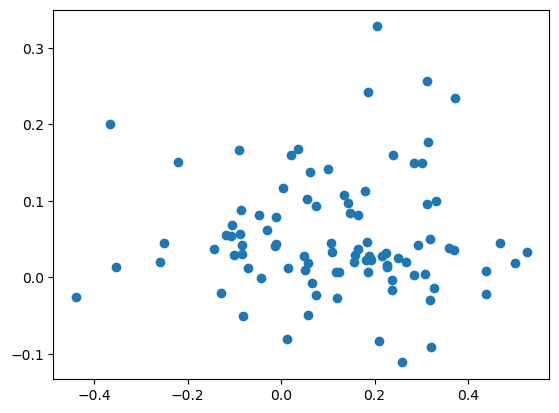

In [19]:
# Compute correlation using corr()
correlation = df['SP500ret'].loc['1970':].corr(df['10YUSTBond'].loc['1970':])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(df['SP500ret'], df['10YUSTBond']);

The correlation coefficient (r) ranges from -1 to 1:

1 means a perfect positive linear relationship.

-1 means a perfect negative linear relationship.

0 means no linear relationship.

The correlation from 1970-2022 between stock returns and bond returns  is 0.00448 which is extremely close to zero, suggesting virtually no linear correlation between the two variables. By default this method uses Pearson correlation, which measures the linear relationship between two datasets. But you can also explicitly call the Scipy pearsonr() function which returns the Pearson correlation coefficient along with the two-tailed p-value. The p-value associated 
To test if this correlation is statistically significant, we can calculate the p-value associated with the Pearson correlation coefficient by using the Scipy pearsonr() function, which returns the Pearson correlation coefficient along with the two-tailed p-value.

In [21]:
pearsonr(df['SP500ret'].loc['1970':], df['10YUSTBond'].loc['1970':])

PearsonRResult(statistic=0.004480552756262246, pvalue=0.9751065109958251)

pvalue = 0.97510651 tell tells you whether the correlation is statistically significant. A common threshold is 0.05:

If p < 0.05, the correlation is statistically significant.

If p ≥ 0.05, the correlation is not statistically significant.

Here, 0.975 is much greater than 0.05, meaning the result is not statistically significant. In other words, the tiny correlation you observed could easily be due to random chance.

The scatter plot visualisation is also not very helpful so a better way to visualisation correlation between stock and bond returns, especially over time, is to use a rolling correlation plot. This shows how the correlation changes year by year, providing more insight than a single scatterplot

In [12]:
window = 10  # Rolling window size in years
rolling_corr = df['SP500ret'].rolling(window).corr(df['10YUSTBond'])

rolling_corr.tail(10)


year
2011   -0.825403
2012   -0.809951
2013   -0.846923
2014   -0.814011
2015   -0.791952
2016   -0.787592
2017   -0.783556
2018   -0.548129
2019   -0.232962
2020   -0.194544
dtype: float64

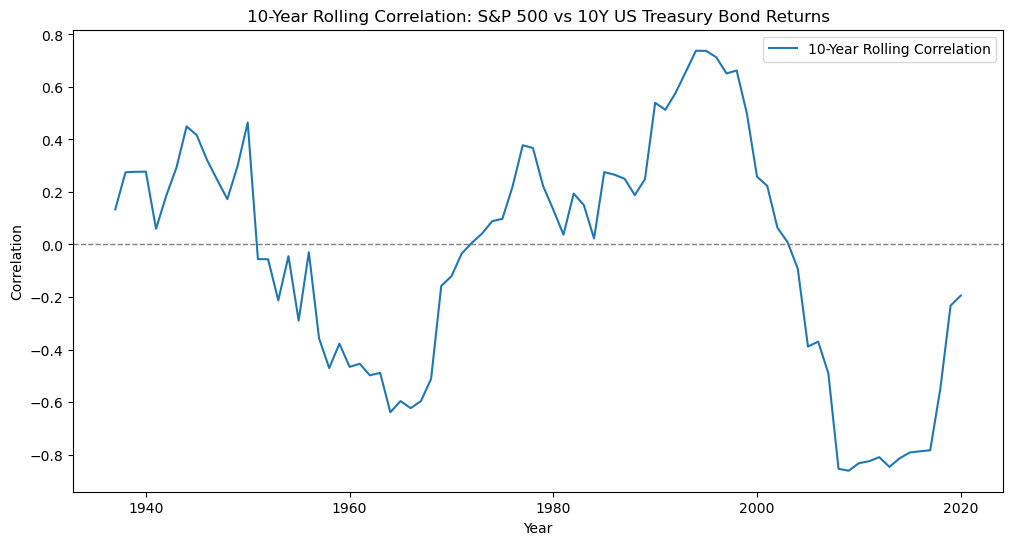

In [13]:
plt.figure(figsize=(12,6))
plt.plot(rolling_corr.index.get_level_values(0), rolling_corr, label=f'{window}-Year Rolling Correlation')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(f'{window}-Year Rolling Correlation: S&P 500 vs 10Y US Treasury Bond Returns')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.legend()
plt.show()

In [9]:
pearsonr(df['SP500ret'], df['10YUSTBond'])

PearsonRResult(statistic=-0.011877817793211558, pvalue=0.9100303176384162)

The correlation coefficient is -0.0118 and the two-tailed  p-value is .91. Since this p-value is bigger than .05, we would conclude that there is no statistically significant correlation between the two variables.

### Calculating cumulative returns

C:\Users\jop_x\AppData\Local\Temp\ipykernel_23124\1699516034.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{int(idx)}" for idx in df.loc['1970':].index], rotation=30, ha='right')


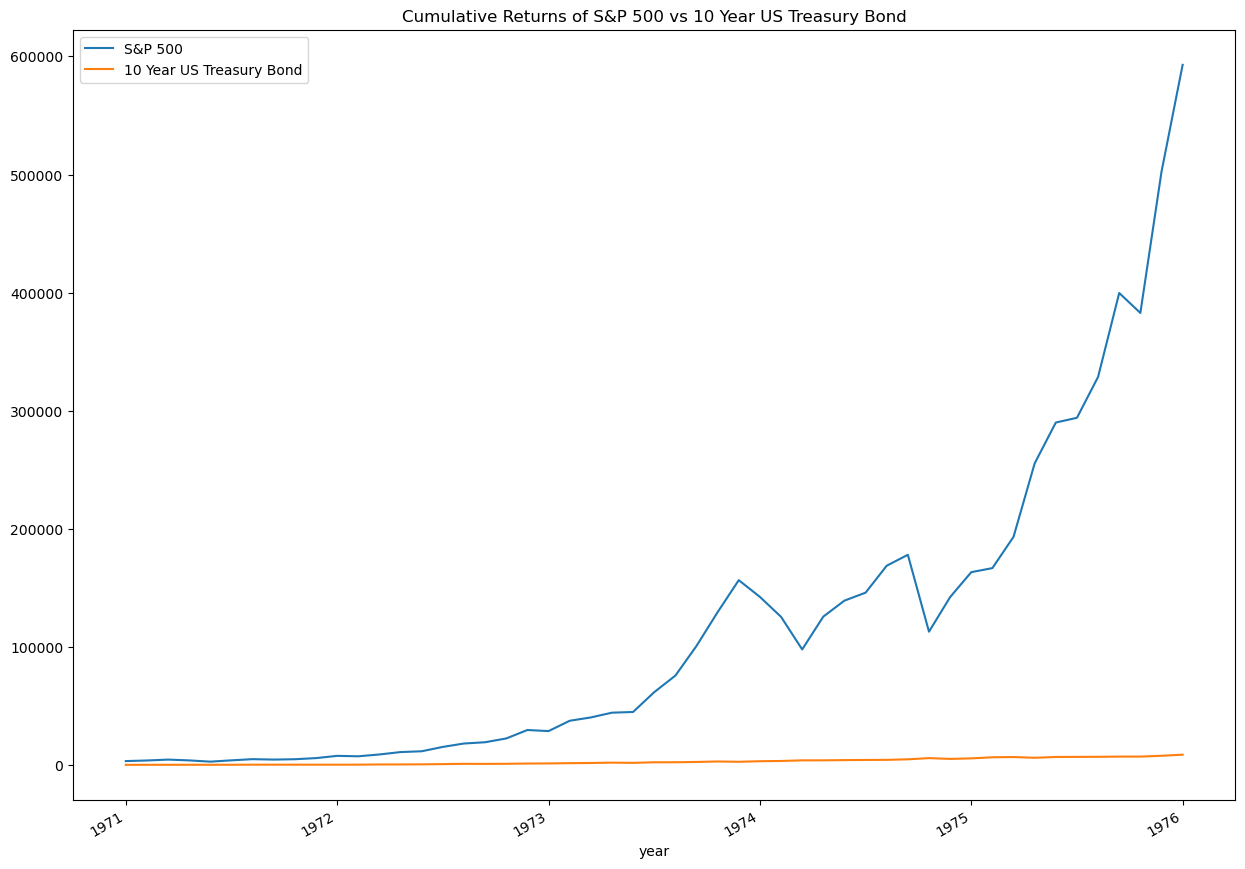

In [14]:
df['CumRetSP500'] = (1 + df['SP500ret']).cumprod()*100
df['CumRet10YUSTBond'] = (1 + df['10YUSTBond']).cumprod()*100

plt.figure(figsize=(15,10))
ax = plt.gca()
df['CumRetSP500'].loc['1970':].plot(label='S&P 500',ax=ax)
df['CumRet10YUSTBond'].loc['1970':].plot(label='10 Year US Treasury Bond',ax=ax)


# Set x-axis labels to year-month and rotate them
ax.set_xticklabels([f"{int(idx)}" for idx in df.loc['1970':].index], rotation=30, ha='right')
plt.title("Cumulative Returns of S&P 500 vs 10 Year US Treasury Bond")

plt.legend()
plt.show()